Using TensorFlow to perform a linear regression with squared loss on 3D random data, to fit a plane <Br/>

z = w1x + w2y + b;     

We generate x and y input randomly, just for the sake of producing z labels/output, we can define weights w1, w2 and b to some arbitraty true values.
And finally, compute z output by further adding noise.

Here, we have used gradientTape function of tensorflow to compute the gradients.

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [0]:
tf.random.set_seed(42)

In [0]:
def function(x, y, w1, w2, b):
  # Function to be used to fit a plane.
  return w1*x + w2*y + b

In [0]:
def square_loss(z, y_pred):
  # Squared loss error
  return sum((y_pred - z ) ** 2) * (1/len(z))

In [0]:
def noise(z):
  # noise, to be added to the z labels.
  return tf.random.normal(z.shape)

In [0]:
# Our input data, x and y
x = tf.random.uniform(shape=[1000, 1], maxval=1, dtype=tf.float32)
y = tf.random.uniform(shape=[1000, 1], maxval=1, dtype=tf.float32)

In [0]:
# Some random numbers, just to be used for producing, Z, or we can say arbitrary true values of parameters.
w1 = tf.Variable(1.5)
w2 = tf.Variable(0.7)
b = tf.Variable(1.0)

In [0]:
# Output value, z
z = function(x, y, w1, w2, b)
z = z + noise(z)

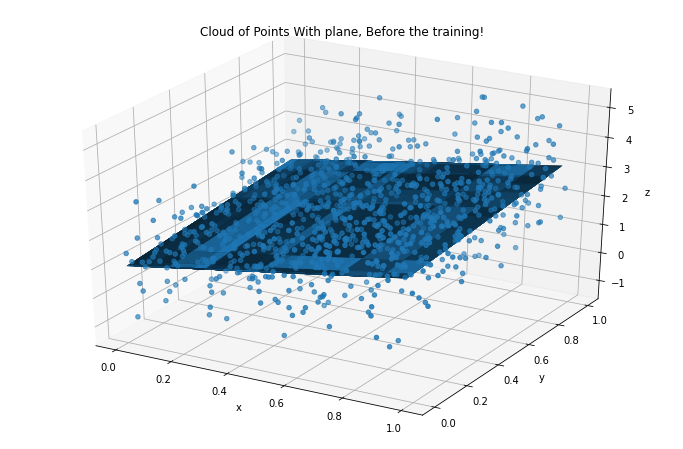

In [9]:
# Before training, using the using the arbitrary true values of parameters, we get a plane like this.

X,Y = np.meshgrid(x,y)
Z = w1*X + w2*Y + b

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set(xlabel="x", ylabel="y", zlabel="z", title = "Cloud of Points With plane, Before the training!")
plt.show()

In [0]:
# This function, we are not going to use in the training, only for checking whether 
# we have implemented the derivative using GradientTape method of tensorflow is 
# correctly implemeneted or not.
def Analytic_Derivative_loss(x, y, z):
  # arbitrarily define some values.
  w1 = tf.Variable(2.5)
  w2 = tf.Variable(2.0)
  b = tf.Variable(1.0)
  
  df_dw1 = 2 * tf.matmul( tf.transpose(x),  (w1*x + w2*y + b - z) ) / len(z)            # Derivative of loss wrt w1
  df_dw2 = 2 * tf.matmul( tf.transpose(y),  (w1*x + w2*y + b - z) ) / len(z)            # Derivative of loss wrt w2
  df_db = (2 *sum(w1*x + w2*y + b - z) * 1) / len(z)                                    # Derivative of loss wrt b

  return df_dw1, df_dw2, df_db

In [11]:
Analytic_Derivative_loss(x, y, z)

(<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.3084893]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.3907855]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.3257868], dtype=float32)>)

In [0]:
# Derivative of squared loss function wrt to w1, w2, n using Tensorflow GradientTape().
def Derivative_loss(theta, x, y, z, i, epoch):
  # unwrap all theta values.
  w1 = theta[0]
  w2 = theta[1]
  b = theta[2]
  
  with tf.GradientTape(persistent=True) as t:             # To compute multiple gradients over the same computation, create a persistent gradient tape.
    t.watch(w1)
    t.watch(w2)
    t.watch(b)

    loss = sum((w1*x + w2*y + b - z) ** 2) * (1/len(z))
    print("Epoch {}/{} -> Loss -> {}".format(i+1, epoch, loss[0]))
  dl_dw1 = t.gradient(loss, w1)
  dl_dw2 = t.gradient(loss, w2)
  dl_db = t.gradient(loss, b)
  del t                             # It drop the reference to the tape.
  
  # wrap them all into one single theta and send them back!!!
  der_theta = tf.stack([dl_dw1, dl_dw2, dl_db])

  return der_theta, loss

In [13]:
# This is just to check if the above function has been applied correctly or not.

# arbitrarily define some values.
w1 = tf.Variable(2.5)
w2 = tf.Variable(2.0)
b = tf.Variable(1.0)
theta = tf.stack([w1, w2, b])
i=0
epoch=1
der_theta, loss = Derivative_loss(theta, x, y, z, i, epoch)
print(der_theta[0], der_theta[1], der_theta[2])

Epoch 1/1 -> Loss -> 2.5772862434387207
tf.Tensor(1.3084896, shape=(), dtype=float32) tf.Tensor(1.3907855, shape=(), dtype=float32) tf.Tensor(2.3257868, shape=(), dtype=float32)


So we can see that the analytic derivative and derivative when using tensorflow GradientTape, are coming out to be similar, So we have passed the test!!!! <Br/>
Now, we can proceed with gradient descent.

In [14]:
alpha = 0.01  # learning rate.
epoch = 100

# Randomly define weights and bias.
w1 = tf.Variable(2.5)
w2 = tf.Variable(2.0)
b = tf.Variable(1.0)

# wrap them into one single theta
theta = tf.stack([w1, w2, b])

derivative_loss = []
loss = []

# gradient descent step
for i in range(epoch):
  der = Derivative_loss(theta, x, y, z, i, epoch)
  theta = theta - (alpha * der[0])

  # To be used in the graph in future.
  derivative_loss.append(theta)
  loss.append(der[1])

Epoch 1/100 -> Loss -> 2.5772862434387207
Epoch 2/100 -> Loss -> 2.4881112575531006
Epoch 3/100 -> Loss -> 2.404289960861206
Epoch 4/100 -> Loss -> 2.3255059719085693
Epoch 5/100 -> Loss -> 2.2514500617980957
Epoch 6/100 -> Loss -> 2.181840419769287
Epoch 7/100 -> Loss -> 2.11641001701355
Epoch 8/100 -> Loss -> 2.0549070835113525
Epoch 9/100 -> Loss -> 1.9970935583114624
Epoch 10/100 -> Loss -> 1.9427491426467896
Epoch 11/100 -> Loss -> 1.8916637897491455
Epoch 12/100 -> Loss -> 1.8436442613601685
Epoch 13/100 -> Loss -> 1.7985022068023682
Epoch 14/100 -> Loss -> 1.7560664415359497
Epoch 15/100 -> Loss -> 1.716174602508545
Epoch 16/100 -> Loss -> 1.67867112159729
Epoch 17/100 -> Loss -> 1.6434136629104614
Epoch 18/100 -> Loss -> 1.6102690696716309
Epoch 19/100 -> Loss -> 1.5791057348251343
Epoch 20/100 -> Loss -> 1.5498087406158447
Epoch 21/100 -> Loss -> 1.5222644805908203
Epoch 22/100 -> Loss -> 1.496366024017334
Epoch 23/100 -> Loss -> 1.4720141887664795
Epoch 24/100 -> Loss -> 1.44

In [15]:
theta  # These are our learned weights.

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.0573206 , 1.5001577 , 0.32569078], dtype=float32)>

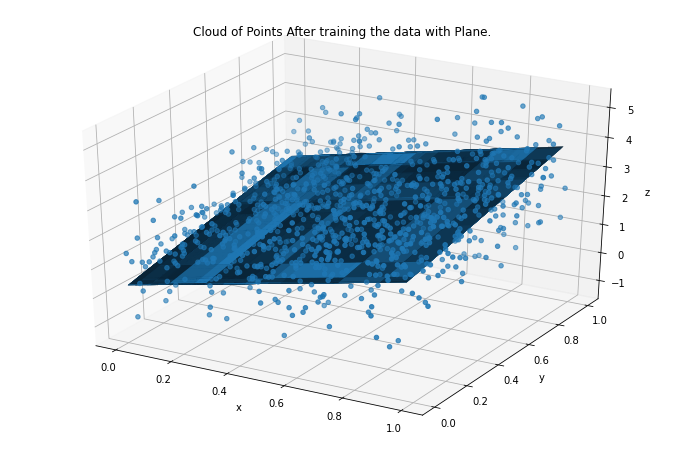

In [16]:
# After training for 100 epochs, we will be able to plot a plane, which is able to
# fit the training data points.
# Unwrap the values in theta.
w1 = theta[0]
w2 = theta[1]
b = theta[2]

#x_new = np.linspace(0,1,100)
#y_new = np.linspace(0,1,100)

# Create a 2d mesh for input x and y to be plotted in 3d graph.
X,Y = np.meshgrid(x,y)
Z_predicted = w1*X + w2*Y + b   # To be used to display the plane.

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)    
ax.plot_surface(X, Y, Z_predicted, alpha=0.5)
ax.set(xlabel="x", ylabel="y", zlabel="z", title = "Cloud of Points After training the data with Plane.")
plt.show()

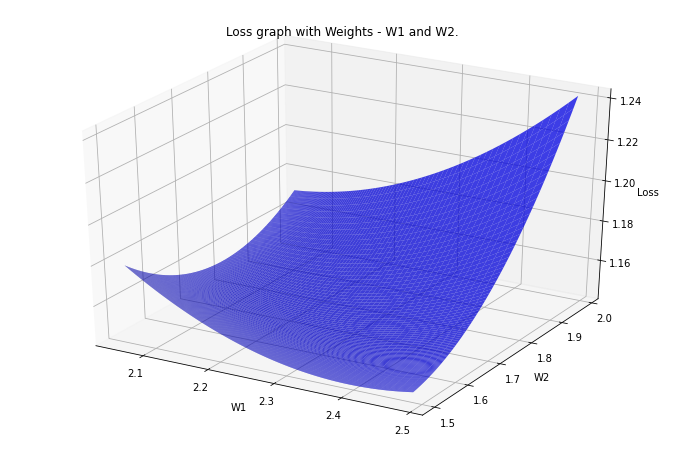

In [17]:
# Plot Loss graph with weights

# function to calculate the loss for weights W1 and W2
def func_loss(ww1, ww2):
  y_pred = ww1*x + ww2*y      # We havent use the bias here, just the two weights, w1 and w2.
  loss = square_loss(z, y_pred)
  return loss

# Converts weights and loss from list of tensors to numpy array.
ww1, ww2, bbb, loss_np = [], [], [], []
for i in range(len(derivative_loss)):
  ww1.append(derivative_loss[i][0].numpy()) 
  ww2.append(derivative_loss[i][1].numpy()) 
  bbb.append(derivative_loss[i][2].numpy())

  loss_np.append(loss[i].numpy())

# Creating a mesh grid of W1 and W2 for plotting 3D graphs.
WW1, WW2 = np.meshgrid(ww1, ww2)

# Calculating the loss funcion.
#zs = np.array([fun(ww1, ww2) for ww1, ww2 in zip(np.ravel(WW1), np.ravel(WW2))])
zs = np.array([func_loss(np.ravel(WW1), np.ravel(WW2) ) ])
Z = zs.reshape(WW1.shape)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(WW1, WW2, Z, rstride=1, cstride=1, color='blue', alpha=0.75)
ax.set(xlabel="W1", ylabel="W2", zlabel="Loss", title = "Loss graph with Weights - W1 and W2.")
plt.show()

Locator attempting to generate 1002 ticks ([1.1422, ..., 1.2423000000000002]), which exceeds Locator.MAXTICKS (1000).


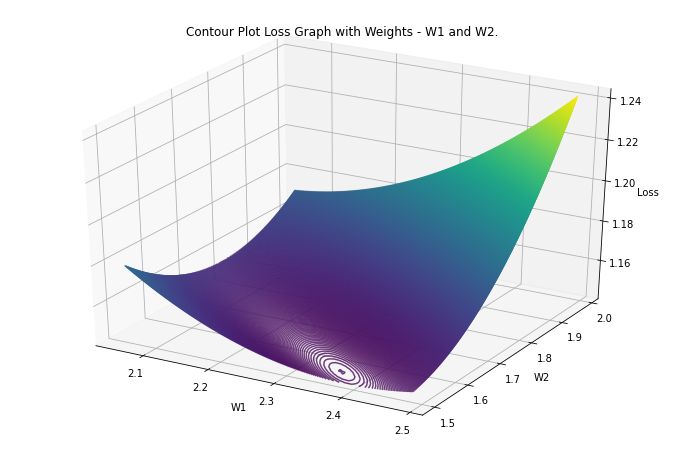

In [18]:
# ALternative way of displaying the graph, using contour3D plot.
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.contour3D(WW1, WW2, Z, 1000, alpha=0.75)
ax.set(xlabel="W1", ylabel="W2", zlabel="Loss", title = "Contour Plot Loss Graph with Weights - W1 and W2.")
plt.show()

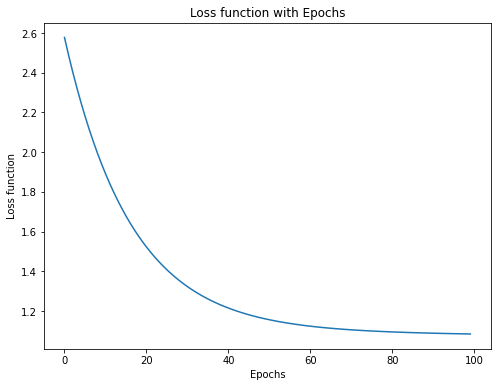

In [19]:
# Plot loss functions with no of iterations.
fig = plt.figure(figsize=(8, 6))

no_epochs = epoch
epochs = np.arange(0, no_epochs)

ax = fig.add_subplot(111)
ax.plot(epochs, loss_np)
ax.set(title = "Loss function with Epochs", ylabel = "Loss function", xlabel = "Epochs")

plt.show()

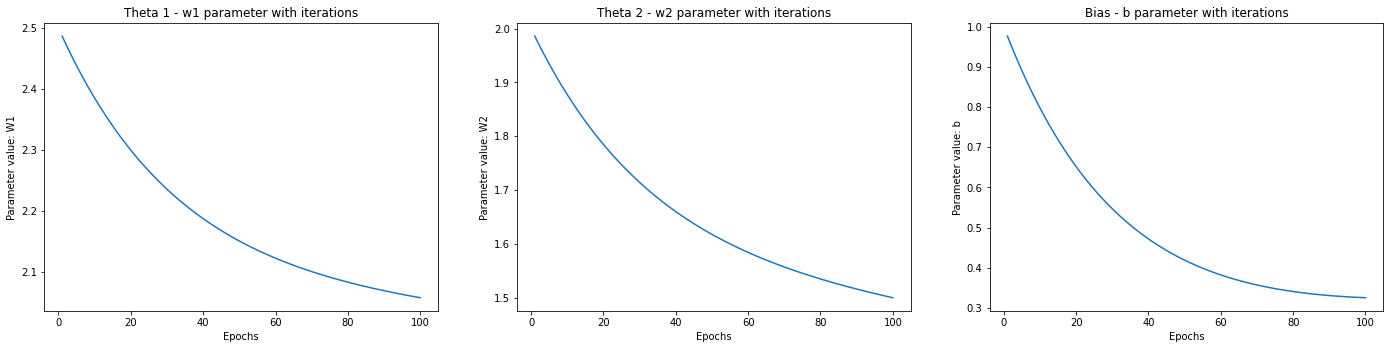

In [20]:
# Parameter approach values.
iterations_to_consider = epoch
iterations = np.arange(0, iterations_to_consider)

fig = plt.figure(figsize = (24, 18))

ax = fig.add_subplot(331)
ax.plot(iterations+1, ww1)
ax.set(title = "Theta 1 - w1 parameter with iterations", ylabel = "Parameter value: W1", xlabel = "Epochs" )

ax = fig.add_subplot(332)
ax.plot(iterations+1, ww2)
ax.set(title = "Theta 2 - w2 parameter with iterations", ylabel = "Parameter value: W2", xlabel = "Epochs")

ax = fig.add_subplot(333)
ax.plot(iterations+1, bbb)
ax.set(title = "Bias - b parameter with iterations", ylabel = "Parameter value: b", xlabel = "Epochs")

plt.show()
# Here, we see that parameter b approches its true value, it is getting a little straight by the end 100 epoch.
# Same thing cannot be said fot parameter w1 and w2. Which means, that if we train a little with more number of epochs, 
# we might get the true values of weights w1, and w2.